# Google Analytics Revenue Prediction

## EDA

**Environment**

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Pandas defaults
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
 
# Make jupyter bigger
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:100% !important; }</style>'))

In [2]:
from myfunctions import *

**Import Dataframe**

In [3]:
df = pd.read_csv("data/df3-2.csv", low_memory=False)

In [4]:
df.head()

,channelGrouping,date,fullVisitorId,visitNumber,visitStartTime,deviceBrowser,deviceCategory,deviceIsMobile,deviceOS,geoCity,geoContinent,geoCountry,geoMetro,geoDomain,geoRegion,geoSubContinent,totalsBounces,totalsNewVisits,totalsPageviews,trafficSourceAdContent,adwordsClickAdNetworkType,adwordsClickGclId,adwordsClickInfoPage,adwordsClickInfoSlot,trafficSourceCampaign,trafficSourceIsTrueDirect,trafficSourceKeyword,trafficSourceMedium,trafficSourceReferralPath,trafficSourceSource,totalsTransactionRevenue,newRevenueDoll,newConversion
0,Organic Search,2016-09-02,1131660440785968503,1,1472830385,Chrome,desktop,False,Windows,Izmir,Asia,Turkey,Unknown,ttnet.com.tr,Izmir,Western Asia,1.0,1.0,1.0,NoAd,NoAdWords,0,0.0,NoAdwords,NoCampaign,False,NoKeyword,organic,NoReferral,google,0.0,0.0,False
1,Organic Search,2016-09-02,377306020877927890,1,1472880147,Firefox,desktop,False,Macintosh,Unknown,Oceania,Australia,Unknown,dodo.net.au,Unknown,Australasia,1.0,1.0,1.0,NoAd,NoAdWords,0,0.0,NoAdwords,NoCampaign,False,NoKeyword,organic,NoReferral,google,0.0,0.0,False
2,Organic Search,2016-09-02,3895546263509774583,1,1472865386,Chrome,desktop,False,Windows,Madrid,Europe,Spain,Unknown,Unknown,Community of Madrid,Southern Europe,1.0,1.0,1.0,NoAd,NoAdWords,0,0.0,NoAdwords,NoCampaign,False,NoKeyword,organic,NoReferral,google,0.0,0.0,False
3,Organic Search,2016-09-02,4763447161404445595,1,1472881213,UC Browser,desktop,False,Linux,Unknown,Asia,Indonesia,Unknown,Unknown,Unknown,Southeast Asia,1.0,1.0,1.0,NoAd,NoAdWords,0,0.0,NoAdwords,NoCampaign,False,google + online,organic,NoReferral,google,0.0,0.0,False
4,Organic Search,2016-09-02,27294437909732085,2,1472822600,Chrome,mobile,True,Android,Unknown,Europe,United Kingdom,Unknown,Unknown,Unknown,Northern Europe,1.0,0.0,1.0,NoAd,NoAdWords,0,0.0,NoAdwords,NoCampaign,True,NoKeyword,organic,NoReferral,google,0.0,0.0,False


### EDA NUMERICAL

The EDA of the numerical vars is on another notebook.

### EDA CATEGORICAL

Subsetting the dataframe with the categorical vars

In [5]:
cat_cols = ['channelGrouping', 'date', 'fullVisitorId', 'visitNumber',
       'visitStartTime', 'deviceBrowser', 'deviceCategory', 'deviceIsMobile',
       'deviceOS', 'geoCity', 'geoContinent', 'geoCountry', 'geoMetro',
       'geoDomain', 'geoRegion', 'geoSubContinent', 'totalsBounces',
       'totalsNewVisits', 'trafficSourceAdContent', 'adwordsClickAdNetworkType',
       'adwordsClickGclId', 'adwordsClickInfoSlot',
       'trafficSourceCampaign', 'trafficSourceIsTrueDirect',
       'trafficSourceKeyword', 'trafficSourceMedium',
       'trafficSourceReferralPath', 'trafficSourceSource']

In [6]:
df[cat_cols].head()

,channelGrouping,date,fullVisitorId,visitNumber,visitStartTime,deviceBrowser,deviceCategory,deviceIsMobile,deviceOS,geoCity,geoContinent,geoCountry,geoMetro,geoDomain,geoRegion,geoSubContinent,totalsBounces,totalsNewVisits,trafficSourceAdContent,adwordsClickAdNetworkType,adwordsClickGclId,adwordsClickInfoSlot,trafficSourceCampaign,trafficSourceIsTrueDirect,trafficSourceKeyword,trafficSourceMedium,trafficSourceReferralPath,trafficSourceSource
0,Organic Search,2016-09-02,1131660440785968503,1,1472830385,Chrome,desktop,False,Windows,Izmir,Asia,Turkey,Unknown,ttnet.com.tr,Izmir,Western Asia,1.0,1.0,NoAd,NoAdWords,0,NoAdwords,NoCampaign,False,NoKeyword,organic,NoReferral,google
1,Organic Search,2016-09-02,377306020877927890,1,1472880147,Firefox,desktop,False,Macintosh,Unknown,Oceania,Australia,Unknown,dodo.net.au,Unknown,Australasia,1.0,1.0,NoAd,NoAdWords,0,NoAdwords,NoCampaign,False,NoKeyword,organic,NoReferral,google
2,Organic Search,2016-09-02,3895546263509774583,1,1472865386,Chrome,desktop,False,Windows,Madrid,Europe,Spain,Unknown,Unknown,Community of Madrid,Southern Europe,1.0,1.0,NoAd,NoAdWords,0,NoAdwords,NoCampaign,False,NoKeyword,organic,NoReferral,google
3,Organic Search,2016-09-02,4763447161404445595,1,1472881213,UC Browser,desktop,False,Linux,Unknown,Asia,Indonesia,Unknown,Unknown,Unknown,Southeast Asia,1.0,1.0,NoAd,NoAdWords,0,NoAdwords,NoCampaign,False,google + online,organic,NoReferral,google
4,Organic Search,2016-09-02,27294437909732085,2,1472822600,Chrome,mobile,True,Android,Unknown,Europe,United Kingdom,Unknown,Unknown,Unknown,Northern Europe,1.0,0.0,NoAd,NoAdWords,0,NoAdwords,NoCampaign,True,NoKeyword,organic,NoReferral,google


In [7]:
df[cat_cols].describe(include='O').T

,count,unique,top,freq
channelGrouping,903455,8,Organic Search,381530
date,903455,366,2016-11-28,4807
fullVisitorId,903455,717715,1957458976293878100,278
deviceBrowser,903455,54,Chrome,620214
deviceCategory,903455,3,desktop,664352
deviceOS,903455,20,Windows,350006
geoCity,903455,648,Unknown,542383
geoContinent,903455,6,Americas,450221
geoCountry,901989,221,United States,364601
geoMetro,903455,93,Unknown,709864


#### channelGrouping

The description of the var itself

Numbers of Nulls:  0
Organic Search    381530
Social            226102
Direct            143002
Referral          104811
Paid Search        25227
Affiliates         16401
Display             6262
Other                120
Name: channelGrouping, dtype: int64


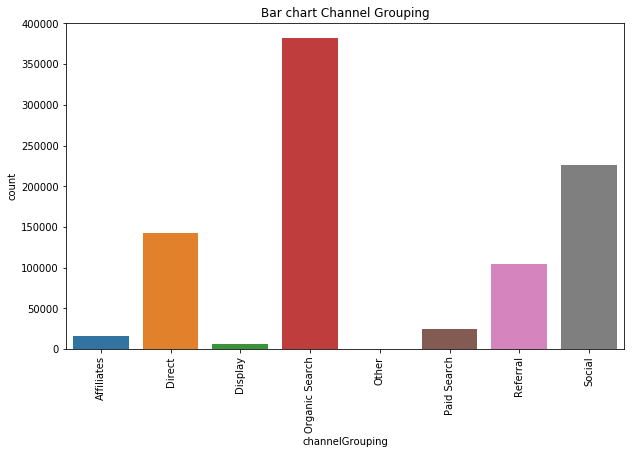

In [8]:
desc_cat(df, 'channelGrouping', 'Channel Grouping') #function created to describe categoricals

The categories are unbalanced. Beeing Organic Search, Social, Direct and Referral the main channels of the visits.

The var comparing it to the target

newConversion     False  True 
channelGrouping               
Affiliates        16392      9
Direct           140960   2042
Display            6120    142
Organic Search   378092   3438
Other               119      1
Paid Search       24759    468
Referral          99500   5311
Social           225998    104


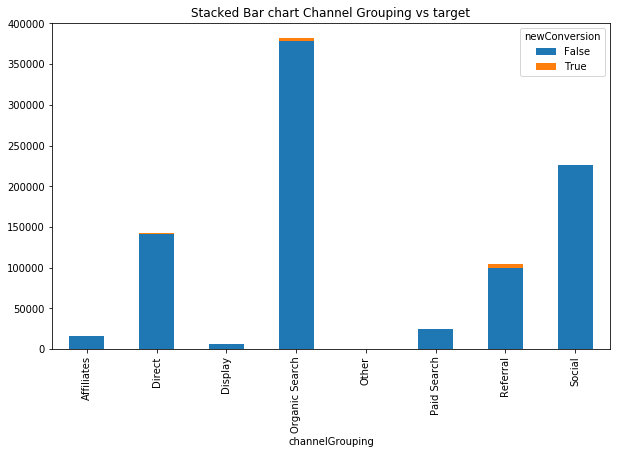

In [9]:
desc_cat_target(df, 'channelGrouping', 'newConversion', name='Channel Grouping')

It seams the var target is more present in the Referral Channel and also in the Organic Channel

I will create a column with only 1 value organic True False 

In [10]:
organic = ['Organic Search','Direct','Referral','Social','Other']
paid = ['Affiliates','Display','Paid Search']

df['newIsOrganic'] = df['channelGrouping'].apply(lambda x: 1 if x in organic else 0)


newConversion   False  True 
newIsOrganic                
0               47271    619
1              844669  10896


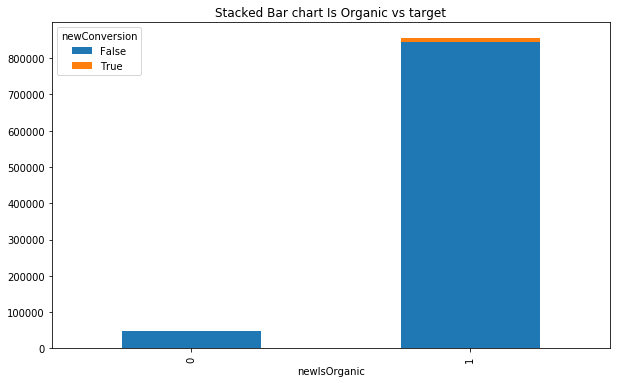

In [11]:
desc_cat_target(df, 'newIsOrganic', 'newConversion', name='Is Organic')

The percentage of the target is very similar for organic and not organic

I will create a column with 5 values organic, referral, direct, paid and other

In [12]:
def select_channel(x):
    organic = ['Organic Search']
    direct = ['Direct']
    referral = ['Referral']
    paid = ['Affiliates','Display','Paid Search']
    other = ['Social','Other']
    if x in organic:
        return 'organic'
    elif x in direct:
        return 'direct'
    elif x in referral:
        return 'referral'
    elif x in paid:
        return 'paid'
    else: #other
        return 'other'

In [13]:
df['newChannel'] = df['channelGrouping'].apply(lambda x: select_channel(x))


newConversion   False  True 
newChannel                  
direct         140960   2042
organic        378092   3438
other          226117    105
paid            47271    619
referral        99500   5311


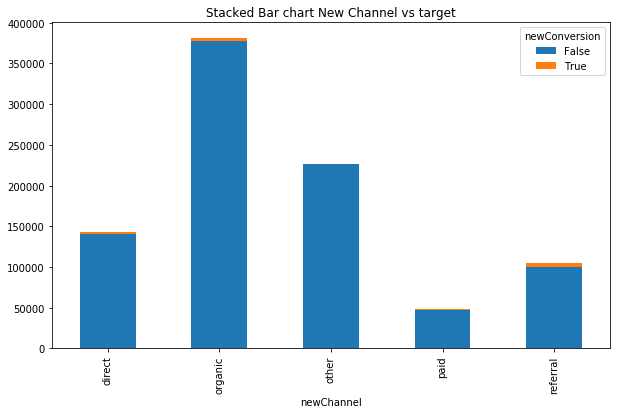

In [14]:
desc_cat_target(df, 'newChannel', 'newConversion', name='New Channel')

#### deviceBrowser

Numbers of Nulls:  0
Chrome                                         620214
Safari                                         182213
Firefox                                         37062
Internet Explorer                               19369
Edge                                            10205
Android Webview                                  7864
Safari (in-app)                                  6850
Opera Mini                                       6139
Opera                                            5642
UC Browser                                       2427
YaBrowser                                        2096
Coc Coc                                           727
Amazon Silk                                       560
Android Browser                                   553
Mozilla Compatible Agent                          374
MRCHROME                                          263
Maxthon                                           246
BlackBerry                                        184
Nintend

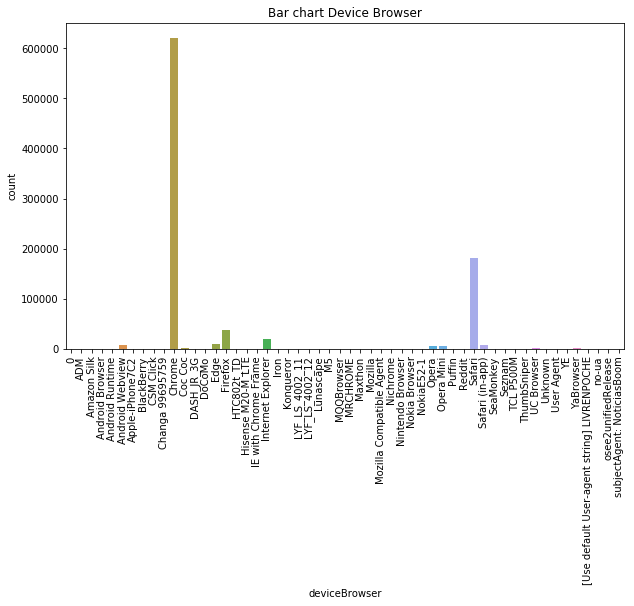

In [15]:
desc_cat(df, 'deviceBrowser', 'Device Browser')

Device vs Target

newConversion                                   False    True 
deviceBrowser                                                 
0                                                 7.0      0.0
ADM                                               1.0      0.0
Amazon Silk                                     559.0      1.0
Android Browser                                 553.0      0.0
Android Runtime                                   2.0      0.0
Android Webview                                7858.0      6.0
Apple-iPhone7C2                                   9.0      0.0
BlackBerry                                      184.0      0.0
CSM Click                                         1.0      0.0
Changa 99695759                                   1.0      0.0
Chrome                                       609861.0  10353.0
Coc Coc                                         727.0      0.0
DASH_JR_3G                                        4.0      0.0
DoCoMo                                            1.0  

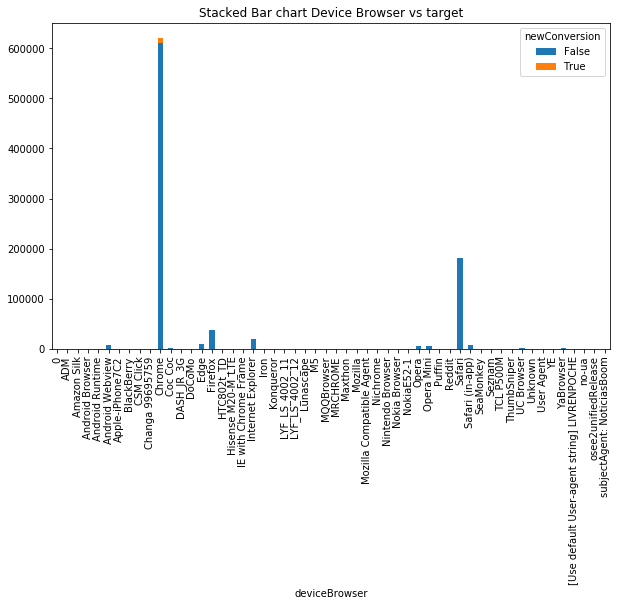

In [16]:
desc_cat_target(df, 'deviceBrowser', 'newConversion', name='Device Browser')

It seams the var target is more present in chrome device Browser

I will create a new column with Chrome, Safari, Firefox, Microsoft, Android, Other

In [17]:
def select_browser(x):
    if 'chrome' in x.lower():
        return 'chrome'
    elif 'safari' in x.lower():
        return 'safari'
    elif 'firefox' in x.lower():
        return 'firefox'
    elif ('explorer' or 'edge') in x.lower():
        return 'microsoft'
    elif 'android' in x.lower():
        return 'android'
    else: #other
        return 'other'

In [18]:
df['newBrowser'] = df['deviceBrowser'].apply(lambda x: select_browser(x))

newConversion   False  True 
newBrowser                  
android          8413      6
chrome         610132  10353
firefox         36871    191
microsoft       19260    109
other           28993     64
safari         188271    792


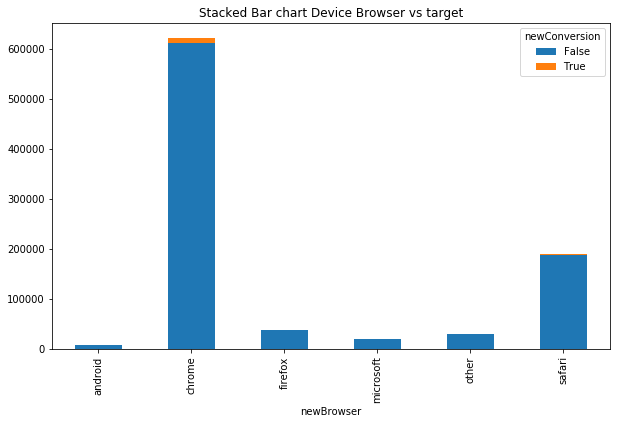

In [19]:
desc_cat_target(df, 'newBrowser', 'newConversion', name='Device Browser')

chrome is the most related browser to transactions

#### deviceCategory

Numbers of Nulls:  0
desktop    664352
mobile     208672
tablet      30431
Name: deviceCategory, dtype: int64


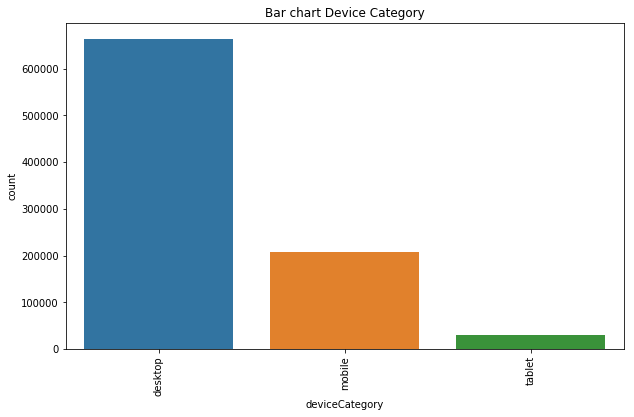

In [20]:
desc_cat(df, 'deviceCategory', 'Device Category')

Device Category vs Target

newConversion    False  True 
deviceCategory               
desktop         653857  10495
mobile          207820    852
tablet           30263    168


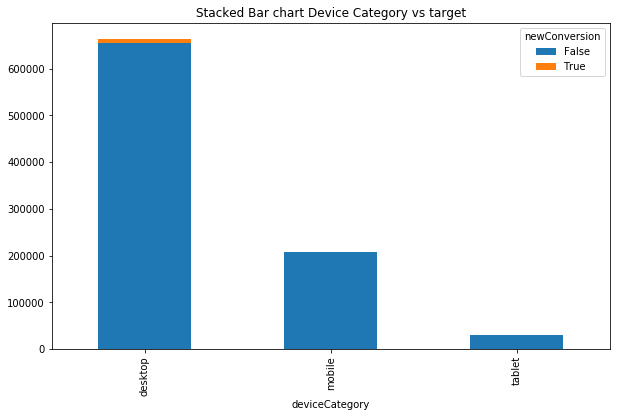

In [21]:
desc_cat_target(df, 'deviceCategory', 'newConversion', name='Device Category')

It seams the var target is more present in the desktop device category

#### deviceOS

Numbers of Nulls:  0
Windows          350006
Macintosh        253880
Android          123845
iOS              107643
Linux             35033
Chrome OS         26334
Unknown            4695
Windows Phone      1216
Samsung             280
BlackBerry          218
Nintendo Wii        100
Firefox OS           88
Xbox                 66
Nintendo WiiU        35
FreeBSD               9
Nokia                 2
OpenBSD               2
Nintendo 3DS          1
NTT DoCoMo            1
SunOS                 1
Name: deviceOS, dtype: int64


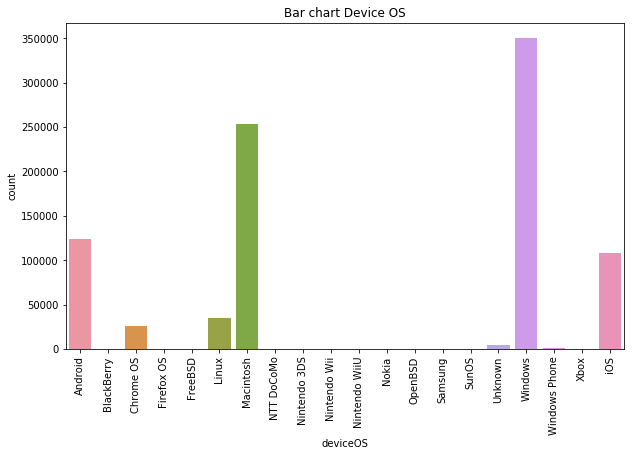

In [22]:
desc_cat(df, 'deviceOS', 'Device OS')

Device Os vs Target

newConversion     False   True 
deviceOS                       
Android        123378.0   467.0
BlackBerry        218.0     0.0
Chrome OS       25340.0   994.0
Firefox OS         88.0     0.0
FreeBSD             9.0     0.0
Linux           34251.0   782.0
Macintosh      247454.0  6426.0
NTT DoCoMo          1.0     0.0
Nintendo 3DS        1.0     0.0
Nintendo Wii      100.0     0.0
Nintendo WiiU      35.0     0.0
Nokia               2.0     0.0
OpenBSD             2.0     0.0
Samsung           280.0     0.0
SunOS               1.0     0.0
Unknown          4695.0     0.0
Windows        347697.0  2309.0
Windows Phone    1215.0     1.0
Xbox               66.0     0.0
iOS            107107.0   536.0


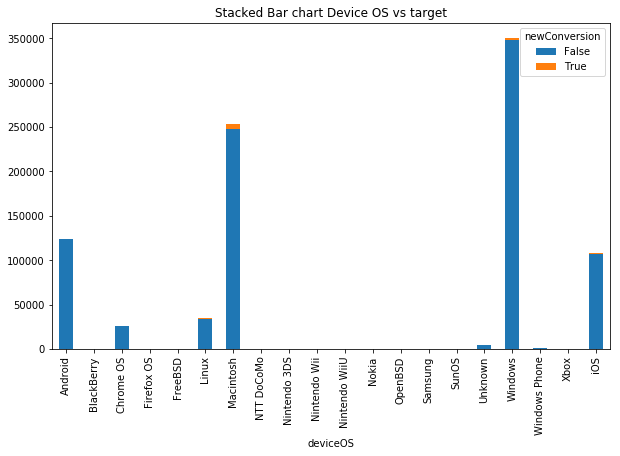

In [23]:
desc_cat_target(df, 'deviceOS', 'newConversion', name='Device OS')

It seams the var target is more present in the Macintosh OS

I will create a column with the main OS: Windows, Macintosh,Android,iOS and Other

In [24]:
def select_os(x):
    if x == 'Windows':
        return 'Windows'
    elif x == 'Macintosh':
        return 'Macintosh'
    elif x == 'Android':
        return 'Android'
    elif x == 'iOS':
        return 'iOS'
    else: #other
        return 'other'

In [25]:
df['newOS'] = df['deviceOS'].apply(lambda x: select_os(x))

newConversion   False  True 
newOS                       
Android        123378    467
Macintosh      247454   6426
Windows        347697   2309
iOS            107107    536
other           66304   1777


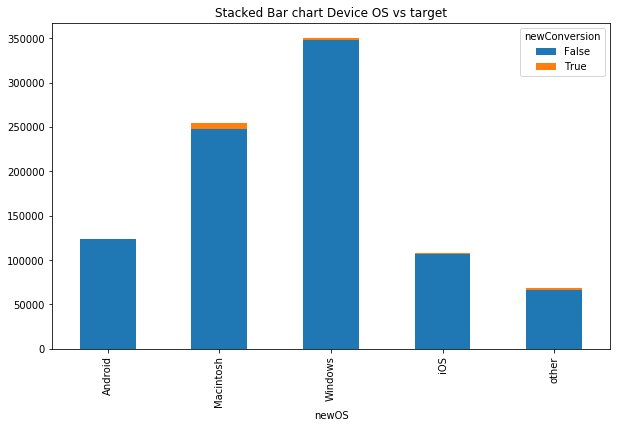

In [26]:
desc_cat_target(df, 'newOS', 'newConversion', name='Device OS')

#### GEOGRAPHIC VARS

We have many geogaphical vars. From very unspecific to Very Specific. **Continent>SubContinent>Region>Country>Domain>City>Metro**

Numbers of Nulls:  0
Americas    450221
Asia        223680
Europe      198294
Oceania      15052
Africa       14742
Unknown       1466
Name: geoContinent, dtype: int64


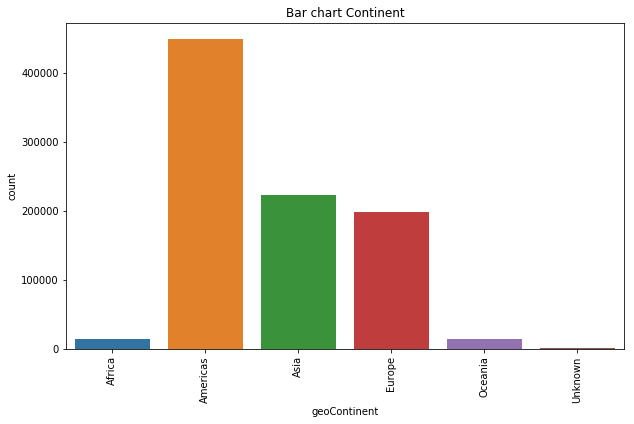

In [27]:
desc_cat(df, 'geoContinent', 'Continent')

newConversion   False  True 
geoContinent                
Africa          14734      8
Americas       438938  11283
Asia           223555    125
Europe         198215     79
Oceania         15038     14
Unknown          1460      6


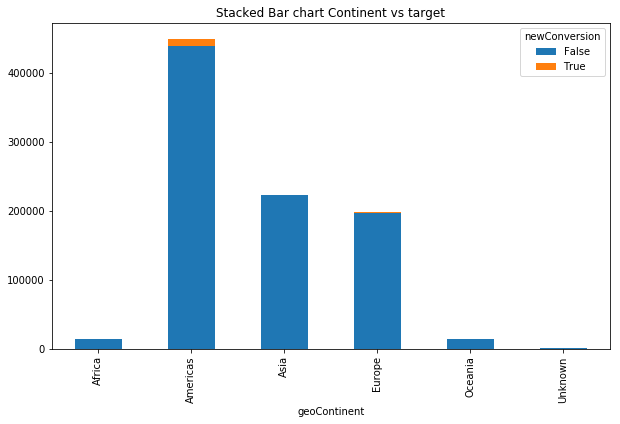

In [28]:
desc_cat_target(df, 'geoContinent', 'newConversion', name='Continent')

It seams the var target is more present in the American Continent

Numbers of Nulls:  0
Northern America      390512
Southeast Asia         77793
Southern Asia          59317
Western Europe         59109
Northern Europe        58164
Eastern Asia           46912
Eastern Europe         45242
South America          41722
Western Asia           38443
Southern Europe        35779
Central America        15582
Australasia            14891
Northern Africa         7682
Western Africa          2571
Caribbean               2405
Southern Africa         2169
Eastern Africa          1927
Unknown                 1466
Central Asia            1215
Middle Africa            393
Melanesia                 81
Micronesian Region        55
Polynesia                 25
Name: geoSubContinent, dtype: int64


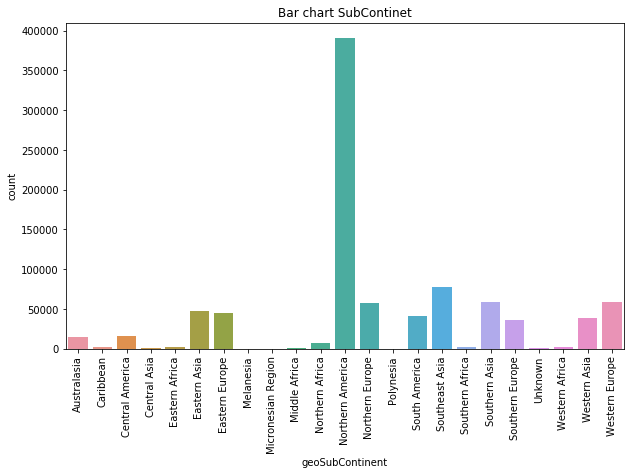

In [29]:
desc_cat(df, 'geoSubContinent', 'SubContinet')

newConversion          False    True 
geoSubContinent                      
Australasia          14877.0     14.0
Caribbean             2389.0     16.0
Central America      15556.0     26.0
Central Asia          1213.0      2.0
Eastern Africa        1924.0      3.0
Eastern Asia         46853.0     59.0
Eastern Europe       45228.0     14.0
Melanesia               81.0      0.0
Micronesian Region      55.0      0.0
Middle Africa          393.0      0.0
Northern Africa       7681.0      1.0
Northern America    379369.0  11143.0
Northern Europe      58137.0     27.0
Polynesia               25.0      0.0
South America        41624.0     98.0
Southeast Asia       77761.0     32.0
Southern Africa       2167.0      2.0
Southern Asia        59306.0     11.0
Southern Europe      35771.0      8.0
Unknown               1460.0      6.0
Western Africa        2569.0      2.0
Western Asia         38422.0     21.0
Western Europe       59079.0     30.0


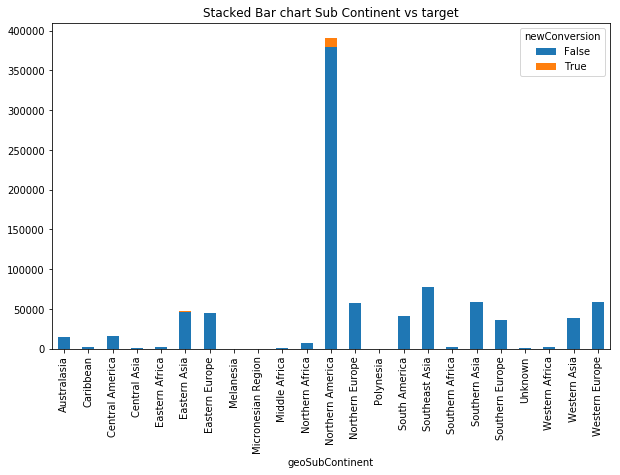

In [30]:
desc_cat_target(df, 'geoSubContinent', 'newConversion', name='Sub Continent')

It seams the var target is more present in the Noth America SubContinent

For the specifier geographical vars, I will just pull out the value counts as the graphs are very unmeaninfull

In [31]:
df['geoRegion'].value_counts().head(10)

Unknown        535947
California     107459
New York        26423
England         13196
Texas            8744
Bangkok          7709
Washington       7640
Illinois         7582
Ho Chi Minh      7249
Istanbul         6330
Name: geoRegion, dtype: int64

In [32]:
df['geoCity'].value_counts().head(10)

Unknown          542383
Mountain View     40874
New York          26361
San Francisco     20319
Sunnyvale         13083
London            12605
San Jose          10290
Los Angeles        8667
Bangkok            7709
Chicago            7441
Name: geoCity, dtype: int64

In [33]:
df['geoCountry'].value_counts().head(10)

United States     364601
India              51137
United Kingdom     37389
Canada             25867
Vietnam            24595
Turkey             20522
Thailand           20123
Germany            19979
Brazil             19781
Japan              19728
Name: geoCountry, dtype: int64

In [34]:
df['geoMetro'].value_counts().head(10)

Unknown                              709864
San Francisco-Oakland-San Jose CA     95881
New York NY                           26906
London                                12569
Los Angeles CA                         9991
Seattle-Tacoma WA                      7640
Chicago IL                             7582
Austin TX                              3788
Washington DC (Hagerstown MD)          3379
Boston MA-Manchester NH                2628
Name: geoMetro, dtype: int64

In [35]:
df['geoDomain'].value_counts().head(10)

Unknown                  390823
comcast.net               28729
rr.com                    14822
verizon.net               13631
ttnet.com.tr              13228
comcastbusiness.net        9982
hinet.net                  7919
virginm.net                6414
3bb.co.th                  6046
prod-infinitum.com.mx      5960
Name: geoDomain, dtype: int64

In [36]:
df['geoDomainTerm'] = df['geoDomain'].apply(lambda x: x.split('.')[-1])

In [37]:
df['geoDomainTerm'].value_counts().head(10)

Unknown    390823
net        180643
com         84159
br          14933
in          14659
tr          14001
jp          13275
de          11321
th          10829
mx          10411
Name: geoDomainTerm, dtype: int64

I will create a new column, with the specifier geografic data that we have. But geo Metro will not be taken into account in this column as it interfiers with the geolocation lat and longitud process.

In [38]:
geo_df = df[['geoCity','geoRegion','geoRegion','geoSubContinent','geoContinent', 'geoDomainTerm']]

In [39]:
geo_df.head(10)

,geoCity,geoRegion,geoRegion,geoSubContinent,geoContinent,geoDomainTerm
0,Izmir,Izmir,Izmir,Western Asia,Asia,tr
1,Unknown,Unknown,Unknown,Australasia,Oceania,au
2,Madrid,Community of Madrid,Community of Madrid,Southern Europe,Europe,Unknown
3,Unknown,Unknown,Unknown,Southeast Asia,Asia,Unknown
4,Unknown,Unknown,Unknown,Northern Europe,Europe,Unknown
5,Unknown,Unknown,Unknown,Southern Europe,Europe,it
6,Unknown,Unknown,Unknown,Southern Asia,Asia,Unknown
7,Brisbane,Queensland,Queensland,Australasia,Oceania,au
8,Unknown,Unknown,Unknown,Western Europe,Europe,at
9,Unknown,Unknown,Unknown,Western Europe,Europe,nl


<font color='red'>PENDIENTE</font>

In [40]:
"""
geo_list = []
range_geo = geo_df.shape[0]
for i in range(range_geo):
    value = 'Unknown'
    j = 0
    while value == 'Unknown':
        value = df[geo_df.columns[j]].iloc[i]
        j += 1
    if value != value:
        geo_list.append('Unknown')
    else:
        geo_list.append(value)
"""

"\ngeo_list = []\nrange_geo = geo_df.shape[0]\nfor i in range(range_geo):\n    value = 'Unknown'\n    j = 0\n    while value == 'Unknown':\n        value = df[geo_df.columns[j]].iloc[i]\n        j += 1\n    if value != value:\n        geo_list.append('Unknown')\n    else:\n        geo_list.append(value)\n"

In [42]:
#df['newGeo'] = pd.Series(geo_list)

In [43]:
df['newGeo'].head()

KeyError: 'newGeo'

In [ ]:
df['newGeo'].isnull().sum()

In [ ]:
import geopy
from geopy.geocoders import Nominatim

In [ ]:
geopy.geocoders.options.default_user_agent = 'my_app/1'
geopy.geocoders.options.default_timeout = 7

In [ ]:
from geopy.extra.rate_limiter import RateLimiter

geopy.geocoders.options.default_user_agent = 'DataScienceProject'
geopy.geocoders.options.default_user_agent = 15
geolocator = Nominatim()

geocode = RateLimiter(geolocator.geocode, min_delay_seconds=3)


In [ ]:
#df['geoGeoLat'] = df['newGeo'].apply(geocode).apply(lambda x: (x.latitude))

In [ ]:
#df['geoGeoLon'] = df['newGeo'].progress_apply(geolocator.geocode).apply(lambda x:(x.longitude))

In [ ]:
"""
geolocator = Nominatim()
lat = []
long = []
i=0
for loc in df['geoGeo']:        
    location = geolocator.geocode(loc)
    #print(i,location)
    lat.append(location.latitude)
    long.append(location.longitude)
    i += 1
"""

#### totalsBounces

Numbers of Nulls:  0
0.0    452879
1.0    450576
Name: totalsBounces, dtype: int64


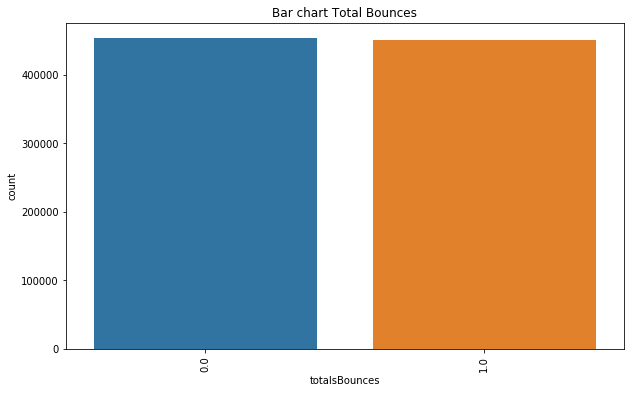

In [44]:
desc_cat(df, 'totalsBounces', 'Total Bounces')

newConversion     False    True 
totalsBounces                   
0.0            441364.0  11515.0
1.0            450576.0      0.0


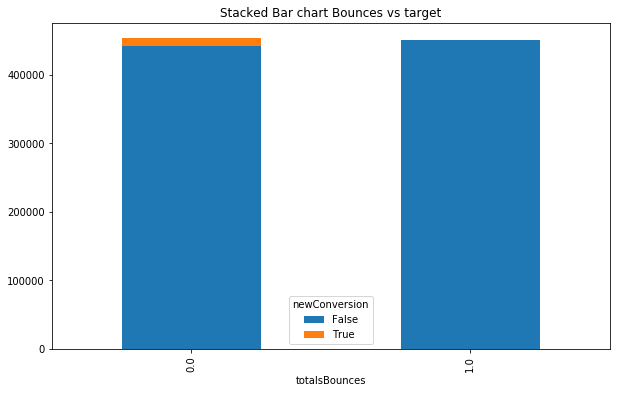

In [45]:
desc_cat_target(df, 'totalsBounces', 'newConversion', name='Bounces')

This one is expected, The visits that do not bouce, are more likely to convert.

#### totalsNewVisits

Numbers of Nulls:  0
1.0    702975
0.0    200480
Name: totalsNewVisits, dtype: int64


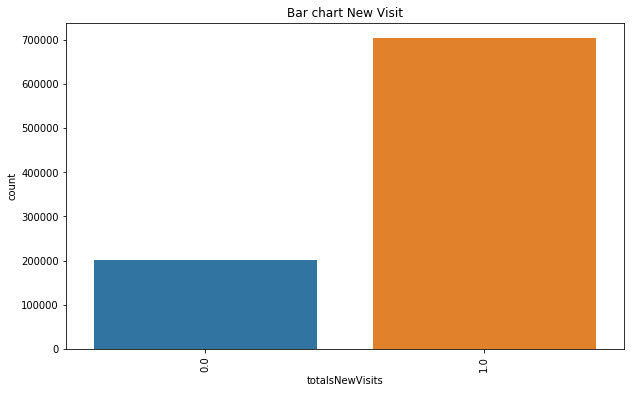

In [46]:
desc_cat(df, 'totalsNewVisits', 'New Visit')


newConversion     False  True 
totalsNewVisits               
0.0              193430   7050
1.0              698510   4465


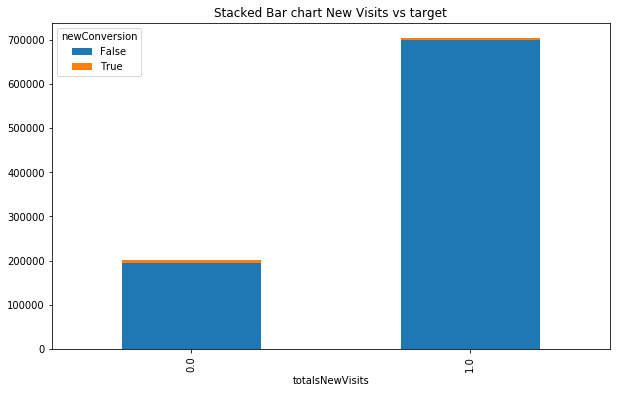

In [47]:
desc_cat_target(df, 'totalsNewVisits', 'newConversion', name='New Visits')


The returning visits are more likely to convert

#### trafficSourceAdContent

Numbers of Nulls:  0
NoAd                                           892544
Google Merchandise Collection                    5114
Google Online Store                              1232
Display Ad created 3/11/14                        966
Full auto ad IMAGE ONLY                           822
Ad from 12/13/16                                  610
Ad from 11/3/16                                   489
Display Ad created 3/11/15                        392
{KeyWord:Google Brand Items}                      246
{KeyWord:Google Merchandise}                      150
Ad from 11/7/16                                   123
Google Merchandise                                 87
First Full Auto Template Test Ad                   87
20% discount                                       75
{KeyWord:Google Branded Gear}                      66
{KeyWord:Looking for Google Bags?}                 65
Swag with Google Logos                             64
Display Ad created 11/17/14                        50
{KeyWor

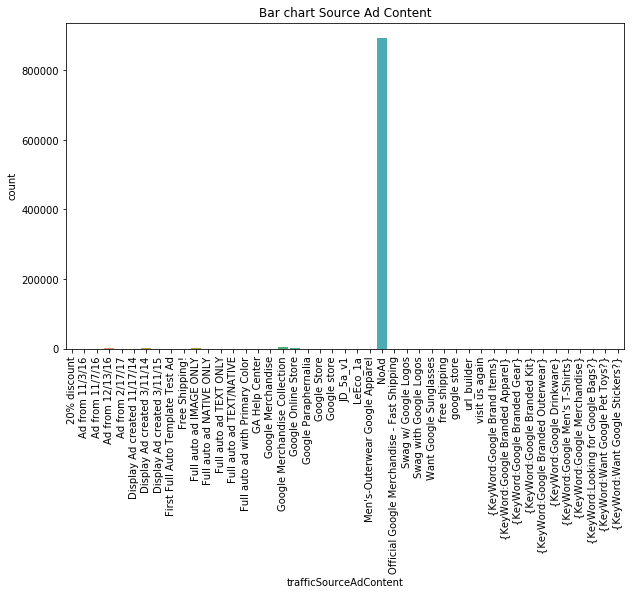

In [48]:
desc_cat(df, 'trafficSourceAdContent', 'Source Ad Content') 

Checking only the Ad values

Numbers of Nulls:  0
Google Merchandise Collection                  5114
Google Online Store                            1232
Display Ad created 3/11/14                      966
Full auto ad IMAGE ONLY                         822
Ad from 12/13/16                                610
Ad from 11/3/16                                 489
Display Ad created 3/11/15                      392
{KeyWord:Google Brand Items}                    246
{KeyWord:Google Merchandise}                    150
Ad from 11/7/16                                 123
Google Merchandise                               87
First Full Auto Template Test Ad                 87
20% discount                                     75
{KeyWord:Google Branded Gear}                    66
{KeyWord:Looking for Google Bags?}               65
Swag with Google Logos                           64
Display Ad created 11/17/14                      50
{KeyWord:Want Google Stickers?}                  42
JD_5a_v1                                   

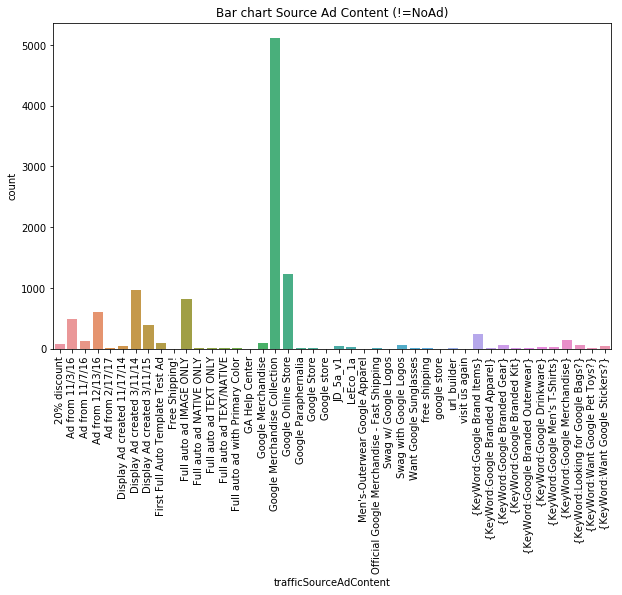

In [49]:
desc_cat(df.loc[df['trafficSourceAdContent'] != 'NoAd'], 'trafficSourceAdContent', 'Source Ad Content (!=NoAd)') 

newConversion                                   False    True 
trafficSourceAdContent                                        
20% discount                                     73.0      2.0
Ad from 11/3/16                                 489.0      0.0
Ad from 11/7/16                                 123.0      0.0
Ad from 12/13/16                                610.0      0.0
Ad from 2/17/17                                   3.0      0.0
Display Ad created 11/17/14                      49.0      1.0
Display Ad created 3/11/14                      963.0      3.0
Display Ad created 3/11/15                      391.0      1.0
First Full Auto Template Test Ad                 87.0      0.0
Free Shipping!                                    2.0      0.0
Full auto ad IMAGE ONLY                         817.0      5.0
Full auto ad NATIVE ONLY                          3.0      0.0
Full auto ad TEXT ONLY                           16.0      0.0
Full auto ad TEXT/NATIVE                          7.0  

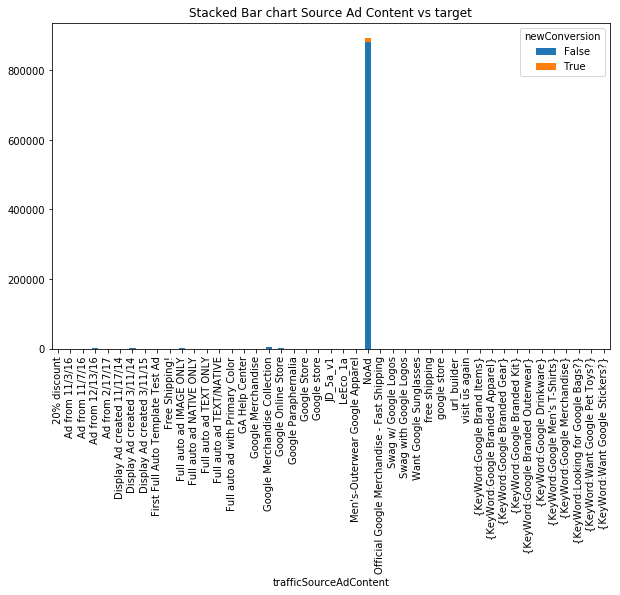

In [50]:
desc_cat_target(df, 'trafficSourceAdContent', 'newConversion', name='Source Ad Content')

newConversion                                 False  True 
trafficSourceAdContent                                    
20% discount                                   73.0    2.0
Ad from 11/3/16                               489.0    0.0
Ad from 11/7/16                               123.0    0.0
Ad from 12/13/16                              610.0    0.0
Ad from 2/17/17                                 3.0    0.0
Display Ad created 11/17/14                    49.0    1.0
Display Ad created 3/11/14                    963.0    3.0
Display Ad created 3/11/15                    391.0    1.0
First Full Auto Template Test Ad               87.0    0.0
Free Shipping!                                  2.0    0.0
Full auto ad IMAGE ONLY                       817.0    5.0
Full auto ad NATIVE ONLY                        3.0    0.0
Full auto ad TEXT ONLY                         16.0    0.0
Full auto ad TEXT/NATIVE                        7.0    0.0
Full auto ad with Primary Color                 3.0    0

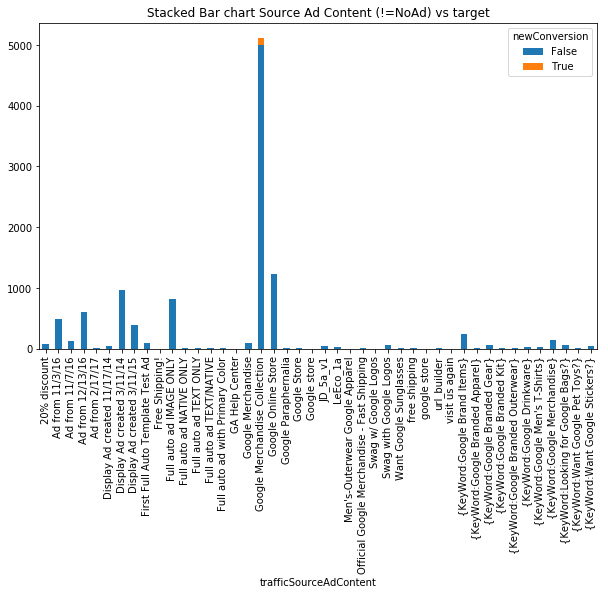

In [51]:
desc_cat_target(df.loc[df['trafficSourceAdContent'] != 'NoAd'], 'trafficSourceAdContent', 'newConversion', name='Source Ad Content (!=NoAd)')

The target is very related with the Google Merchandise Collection as Source Ad Content

I will create another column with the values: NoAd, Google Merchandise Collection, OtherAd

In [52]:
def select_adcontent(x):
    if x == 'NoAd':
        return 'NoAd'
    elif x == 'Google Merchandise Collection':
        return 'GoogleMerchandiseCollection'
    else: #other
        return 'OtherAd'

In [53]:
df['newAdContent'] = df['trafficSourceAdContent'].apply(lambda x: select_adcontent(x))

newConversion                 False  True 
newAdContent                              
GoogleMerchandiseCollection    4997    117
NoAd                         881172  11372
OtherAd                        5771     26


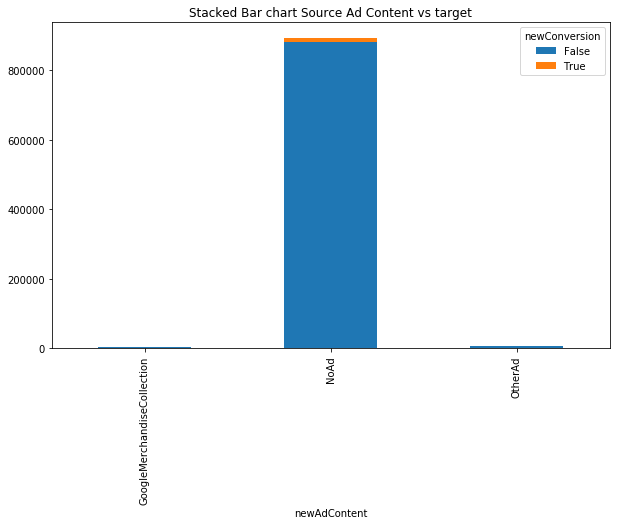

In [54]:
desc_cat_target(df, 'newAdContent', 'newConversion', name='Source Ad Content')

#### adwordsClickAdNetworkType

Numbers of Nulls:  0
NoAdWords          882093
Google Search       21355
Search partners         7
Name: adwordsClickAdNetworkType, dtype: int64


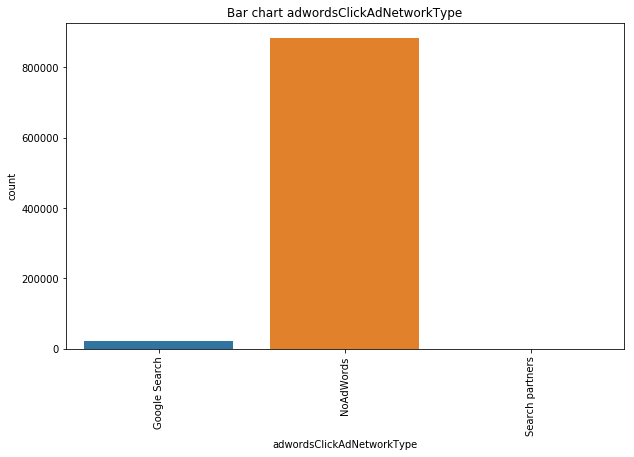

In [55]:
desc_cat(df, 'adwordsClickAdNetworkType', 'adwordsClickAdNetworkType')

newConversion                 False    True 
adwordsClickAdNetworkType                   
Google Search               20901.0    454.0
NoAdWords                  871032.0  11061.0
Search partners                 7.0      0.0


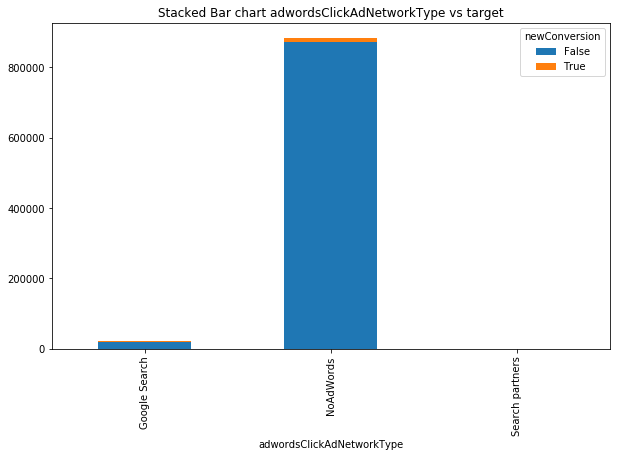

In [56]:
desc_cat_target(df, 'adwordsClickAdNetworkType', 'newConversion', name='adwordsClickAdNetworkType')

newConversion                False  True 
adwordsClickAdNetworkType                
Google Search              20901.0  454.0
Search partners                7.0    0.0


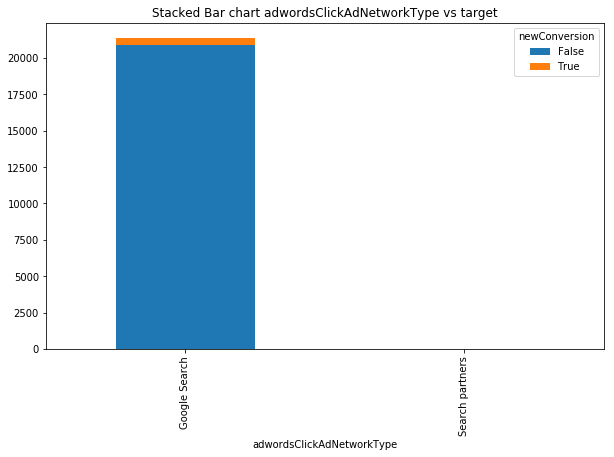

In [57]:
desc_cat_target(df.loc[df['adwordsClickAdNetworkType'] != 'NoAdWords'], 'adwordsClickAdNetworkType', 'newConversion', name='adwordsClickAdNetworkType')

#### adwordsClickGclId

Numbers of Nulls:  0
0    881992
1     21463
Name: adwordsClickGclId, dtype: int64


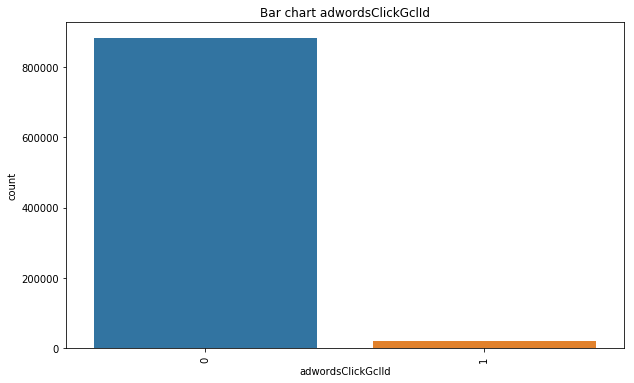

In [58]:
desc_cat(df, 'adwordsClickGclId', 'adwordsClickGclId')


newConversion       False  True 
adwordsClickGclId               
0                  870933  11059
1                   21007    456


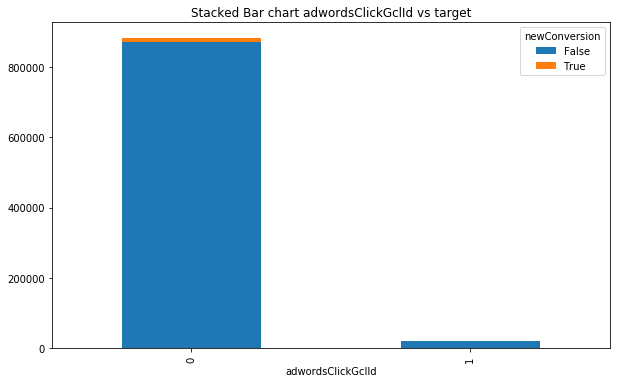

In [59]:
desc_cat_target(df, 'adwordsClickGclId', 'newConversion', name='adwordsClickGclId')


#### adwordsClickInfoSlot

Numbers of Nulls:  0
NoAdwords    882093
Top           20897
RHS             465
Name: adwordsClickInfoSlot, dtype: int64


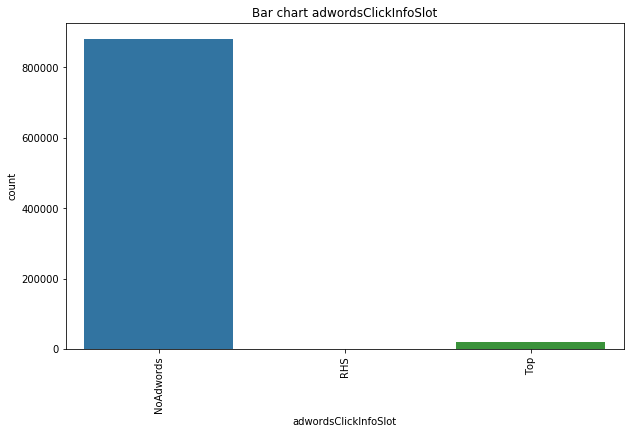

In [60]:
desc_cat(df, 'adwordsClickInfoSlot', 'adwordsClickInfoSlot')

newConversion          False  True 
adwordsClickInfoSlot               
NoAdwords             871032  11061
RHS                      460      5
Top                    20448    449


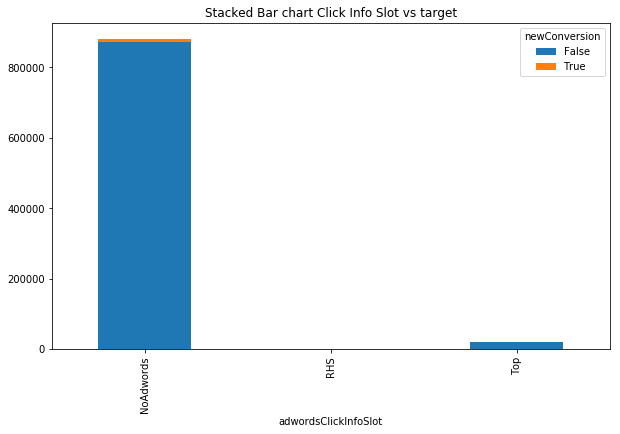

In [61]:
desc_cat_target(df, 'adwordsClickInfoSlot', 'newConversion', name='Click Info Slot')

#### trafficSourceCampaign

Numbers of Nulls:  0
NoCampaign                                         865249
Data Share Promo                                    16401
AW - Dynamic Search Ads Whole Site                  14180
AW - Accessories                                     7038
test-liyuhz                                           392
AW - Electronics                                       94
Retail (DO NOT EDIT owners nophakun and tianyu)        50
AW - Apparel                                           46
All Products                                            4
Data Share                                              1
Name: trafficSourceCampaign, dtype: int64


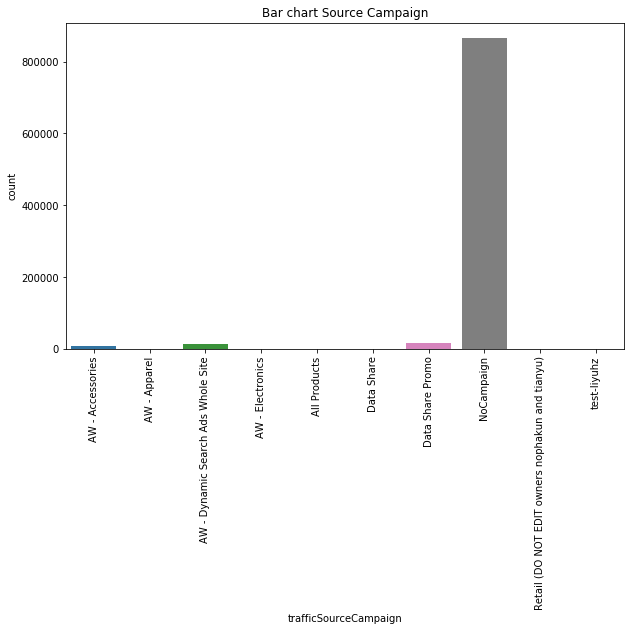

In [62]:
desc_cat(df, 'trafficSourceCampaign', 'Source Campaign')

newConversion                                       False    True 
trafficSourceCampaign                                             
AW - Accessories                                   6908.0    130.0
AW - Apparel                                         45.0      1.0
AW - Dynamic Search Ads Whole Site                13857.0    323.0
AW - Electronics                                     94.0      0.0
All Products                                          4.0      0.0
Data Share                                            1.0      0.0
Data Share Promo                                  16392.0      9.0
NoCampaign                                       854199.0  11050.0
Retail (DO NOT EDIT owners nophakun and tianyu)      49.0      1.0
test-liyuhz                                         391.0      1.0


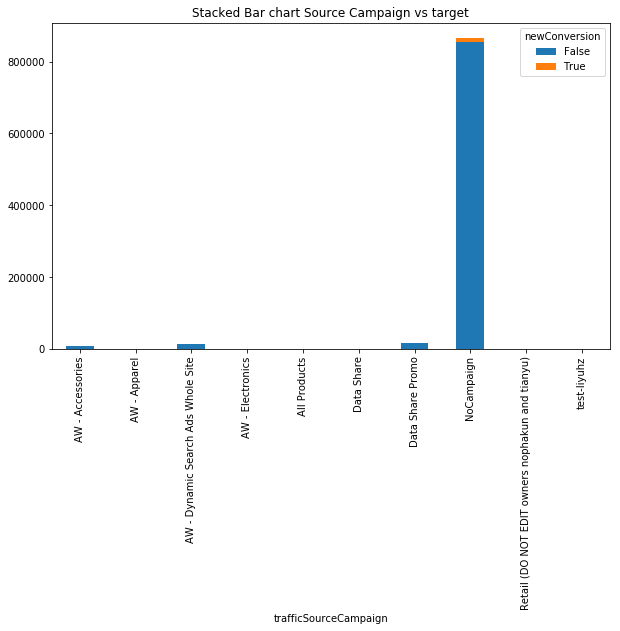

In [63]:
desc_cat_target(df, 'trafficSourceCampaign', 'newConversion', name='Source Campaign')

newConversion                                      False  True 
trafficSourceCampaign                                          
AW - Accessories                                  6908.0  130.0
AW - Apparel                                        45.0    1.0
AW - Dynamic Search Ads Whole Site               13857.0  323.0
AW - Electronics                                    94.0    0.0
All Products                                         4.0    0.0
Data Share                                           1.0    0.0
Data Share Promo                                 16392.0    9.0
Retail (DO NOT EDIT owners nophakun and tianyu)     49.0    1.0
test-liyuhz                                        391.0    1.0


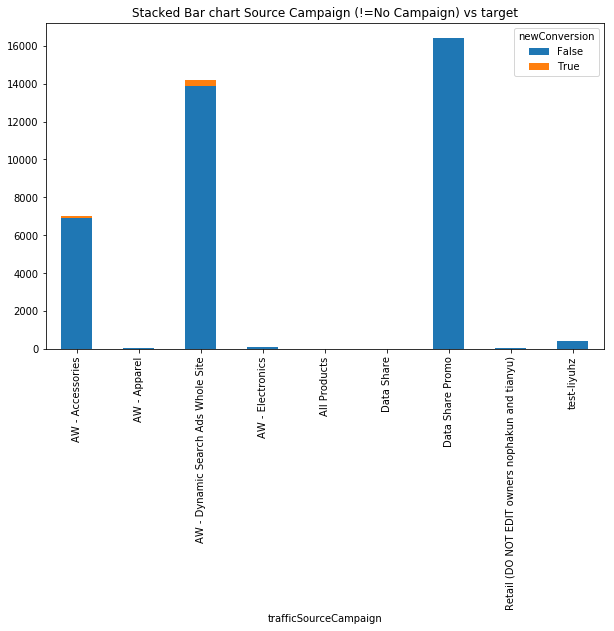

In [64]:
desc_cat_target(df.loc[df['trafficSourceCampaign'] != 'NoCampaign'], 'trafficSourceCampaign', 'newConversion', name='Source Campaign (!=No Campaign)')

I will create a new column grouping Data Share, AW, No Campaign and other

In [65]:
def select_campaign(x):
    if 'data share' in x.lower():
        return 'Data Share'
    elif 'aw ' in x.lower():
        return 'AW'
    elif 'nocampaign' in x.lower():
        return 'NoCampaign'
    else: #other
        return 'other'

In [66]:
df['newAdCampaign'] = df['trafficSourceCampaign'].apply(lambda x: select_campaign(x))

newConversion   False  True 
newAdCampaign               
AW              20904    454
Data Share      16393      9
NoCampaign     854199  11050
other             444      2


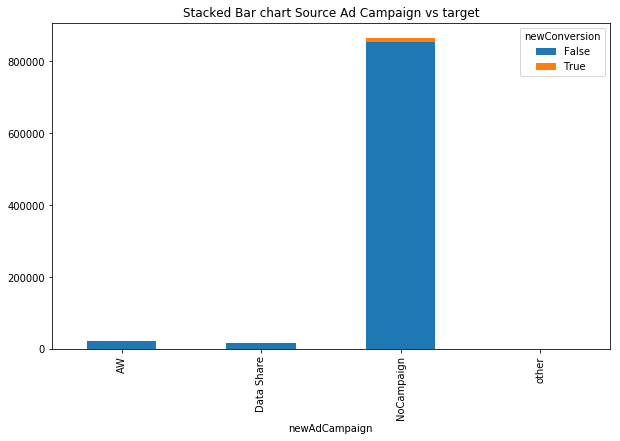

In [67]:
desc_cat_target(df, 'newAdCampaign', 'newConversion', name='Source Ad Campaign')

newConversion  False  True 
newAdCampaign              
AW             20904    454
Data Share     16393      9
other            444      2


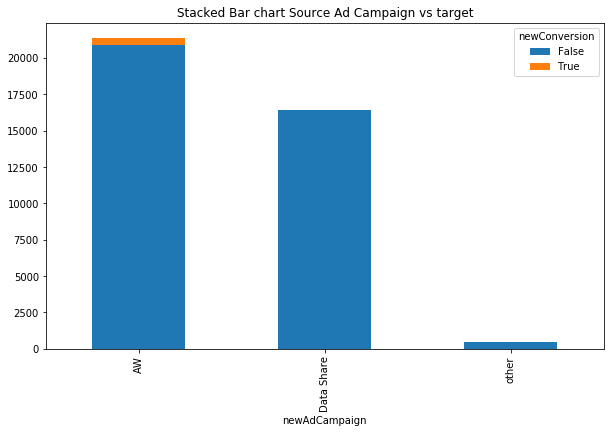

In [68]:
desc_cat_target(df.loc[df['newAdCampaign'] != 'NoCampaign'], 'newAdCampaign', 'newConversion', name='Source Ad Campaign')

The Campaigns in adwords are more likely to convertion

#### trafficSourceIsTrueDirect

Numbers of Nulls:  0
False    629543
True     273912
Name: trafficSourceIsTrueDirect, dtype: int64


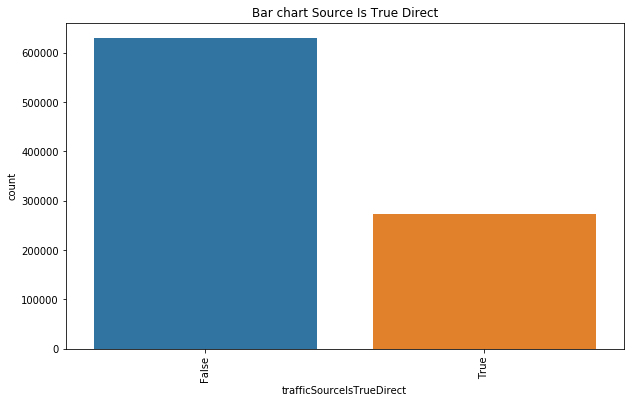

In [69]:
desc_cat(df, 'trafficSourceIsTrueDirect', 'Source Is True Direct')


newConversion               False  True 
trafficSourceIsTrueDirect               
False                      625032   4511
True                       266908   7004


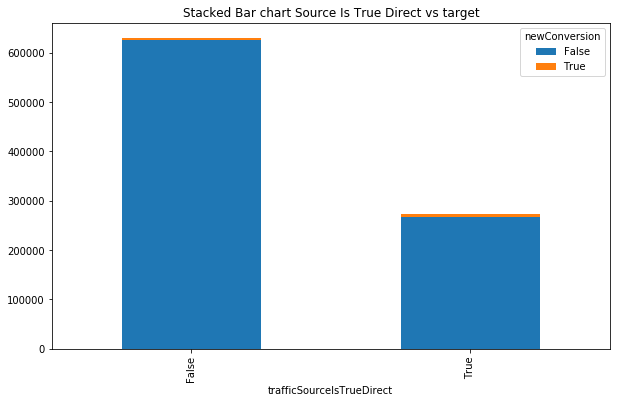

In [70]:
desc_cat_target(df, 'trafficSourceIsTrueDirect', 'newConversion', name='Source Is True Direct')

The target seem to be more related to the direct traffic 

#### trafficSourceKeyword

In [71]:
df['trafficSourceKeyword'].isnull().sum()

0

In [72]:
df['trafficSourceKeyword'].value_counts().head(10)

NoKeyword                          869193
6qEhsCssdK0z36ri                    11468
(Remarketing/Content targeting)      2297
1hZbAqLCbjwfgOH7                     2241
google merchandise store             2209
Google Merchandise                   1648
google store                         1270
youtube                               568
(User vertical targeting)             489
1X4Me6ZKNV0zg-jV                      461
Name: trafficSourceKeyword, dtype: int64

In [73]:
def select_keyword(x):
    dinamic = ['6qEhsCssdK0z36ri','1hZbAqLCbjwfgOH7','1X4Me6ZKNV0zg-jV']
    if x == 'NoKeyword':
        return 'NoKeyword'
    elif x in dinamic:
        return 'Dinamic'
    elif 'remarketing' in x.lower():
        return 'Remarketing'
    elif 'google' in x.lower():
        return 'Google'
    elif 'youtube' in x.lower():
        return 'Youtube'
    else: #other
        return 'other'

In [74]:
df['newAdKeyword'] = df['trafficSourceKeyword'].apply(lambda x: select_keyword(x))

newConversion   False  True 
newAdKeyword                
Dinamic         13847    323
Google          10768    144
NoKeyword      858162  11031
Remarketing      2288      9
Youtube          2827      5
other            4048      3


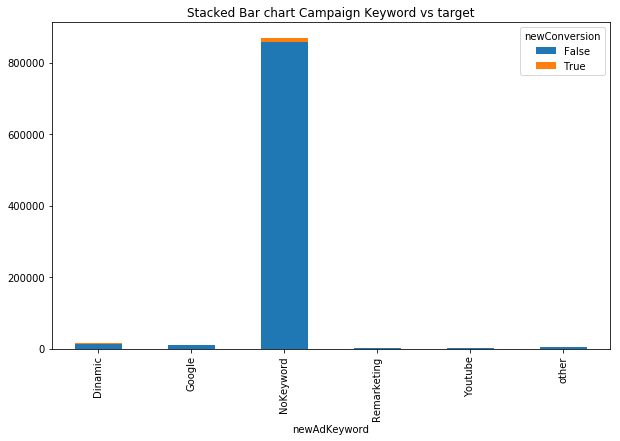

In [75]:
desc_cat_target(df, 'newAdKeyword', 'newConversion', name='Campaign Keyword')

newConversion  False  True 
newAdKeyword               
Dinamic        13847    323
Google         10768    144
Remarketing     2288      9
Youtube         2827      5
other           4048      3


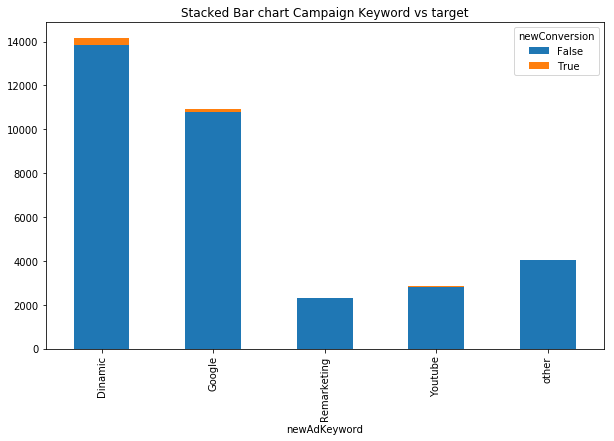

In [76]:
desc_cat_target(df.loc[df['newAdKeyword'] != 'NoKeyword'], 'newAdKeyword', 'newConversion', name='Campaign Keyword')

#### trafficSourceMedium


Numbers of Nulls:  0
organic      381530
referral     330913
none         143002
cpc           25227
affiliate     16401
cpm            6262
other           120
Name: trafficSourceMedium, dtype: int64


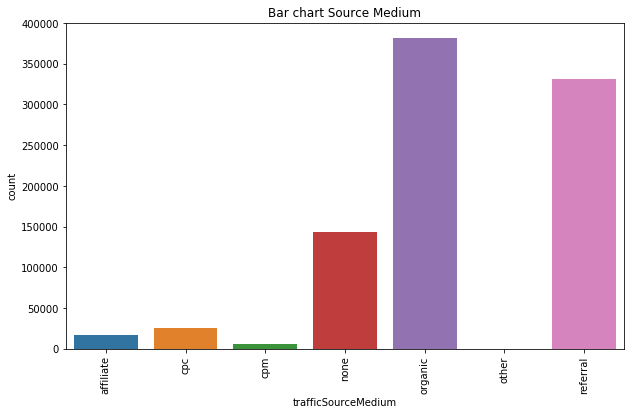

In [77]:
desc_cat(df, 'trafficSourceMedium', 'Source Medium')

newConversion         False  True 
trafficSourceMedium               
affiliate             16392      9
cpc                   24759    468
cpm                    6120    142
none                 140960   2042
organic              378092   3438
other                   119      1
referral             325498   5415


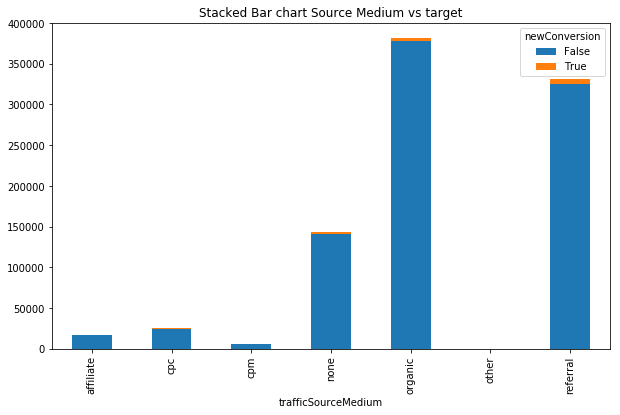

In [78]:
desc_cat_target(df, 'trafficSourceMedium', 'newConversion', name='Source Medium')

The referral again seems to be related to the target

#### trafficSourceReferralPath


In [79]:
df['trafficSourceReferralPath'].isnull().sum()

0

In [80]:
df['trafficSourceReferralPath'].value_counts().head(10)

NoReferral           572556
/                     75502
/yt/about/            71029
/analytics/web/       14618
/yt/about/tr/         14599
/yt/about/vi/         13753
/yt/about/es-419/     12734
/yt/about/pt-BR/      12003
/yt/about/th/         11430
/yt/about/ru/         11193
Name: trafficSourceReferralPath, dtype: int64

In [81]:
df['trafficSourceReferralPath'].loc[df['newConversion'] == True].value_counts().head(10)

NoReferral                                                                            6100
/                                                                                     5151
/mail/u/0/                                                                              55
/a/google.com/forum/                                                                    35
/google-merchandise-store                                                               22
/offer/2145                                                                             18
/deal/-ds-sign-up-for-google-merchandise-store-emails-for-special-coup-c179             17
/a/google.com/googletopia/discounts-deals-and-free-stuff/alphabet-google-discounts      12
/a/google.com/google-merchandise-store/on-site-store/mountain-view-store                11
/a/google.com/google-merchandise-store/on-site-store                                     9
Name: trafficSourceReferralPath, dtype: int64

I will create a column with the main referral paths Home, youtube, Other and NoReferral

In [82]:
def select_referral(x):
    if x == 'NoReferral':
        return 'NoReferral'
    elif 'yt' in x.lower():
        return 'Youtube'
    elif x == '/':
        return 'Home'
    elif 'google.com' in x.lower():
        return 'Google'   
    else: #other
        return 'other'

In [83]:
df['newReferralPath'] = df['trafficSourceReferralPath'].apply(lambda x: select_referral(x))

newConversion     False  True 
newReferralPath               
Google             3654     76
Home              70351   5151
NoReferral       566456   6100
Youtube          227037     10
other             24442    178


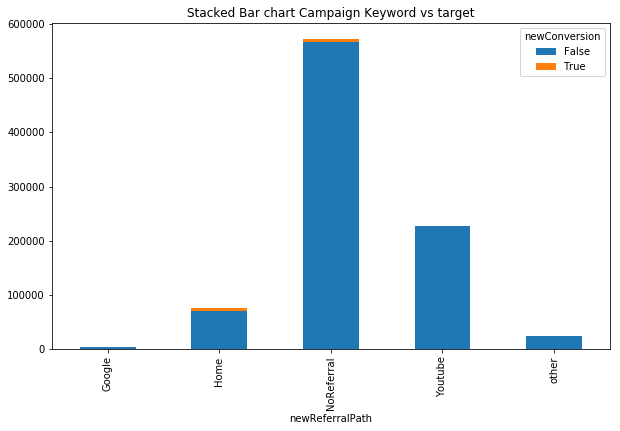

In [84]:
desc_cat_target(df, 'newReferralPath', 'newConversion', name='Campaign Keyword')


newConversion     False  True 
newReferralPath               
Google             3654     76
Home              70351   5151
Youtube          227037     10
other             24442    178


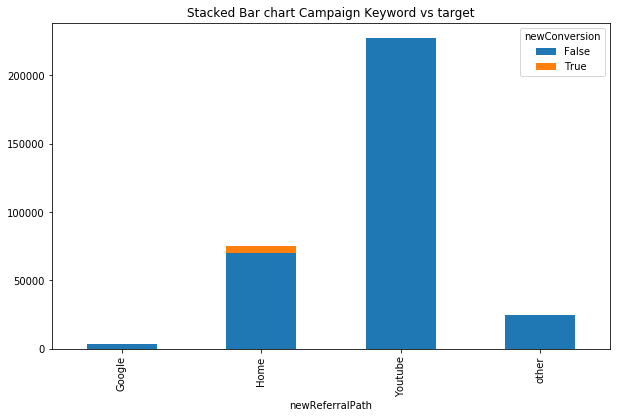

In [85]:
desc_cat_target(df.loc[df['newReferralPath'] != 'NoReferral'], 'newReferralPath', 'newConversion', name='Campaign Keyword')


#### trafficSourceSource


In [86]:
df['trafficSourceSource'].isnull().sum()

0

In [87]:
df['trafficSourceSource'].value_counts().head(10)

google                  400658
youtube.com             212589
direct                  143004
mall.googleplex.com      66397
Partners                 16409
analytics.google.com     16170
dfa                       5686
google.com                4666
m.facebook.com            3364
baidu                     3356
Name: trafficSourceSource, dtype: int64

In [88]:
df['trafficSourceSource'].loc[df['newConversion'] == True].value_counts().head(10)

mall.googleplex.com    5103
google                 3879
direct                 2042
dfa                     123
mail.google.com          62
sites.google.com         42
dealspotr.com            40
groups.google.com        38
yahoo                    22
bing                     21
Name: trafficSourceSource, dtype: int64

I create a column with the main traffic sources

In [89]:
def select_traffic(x):
    if 'googleplex' in x.lower():
        return 'Googleplex'
    if 'google' in x.lower():
        return 'Google'
    elif 'youtube' in x.lower():
        return 'Youtube'
    elif 'direct' in x.lower():
        return 'direct'    
    elif 'google.com' in x.lower():
        return 'Google'   
    else: #other
        return 'other'

In [90]:
df['newSourceTraffic'] = df['trafficSourceSource'].apply(lambda x: select_traffic(x))

newConversion      False  True 
newSourceTraffic               
Google            427511   4046
Googleplex         62371   5121
Youtube           212673     11
direct            140962   2042
other              48423    295


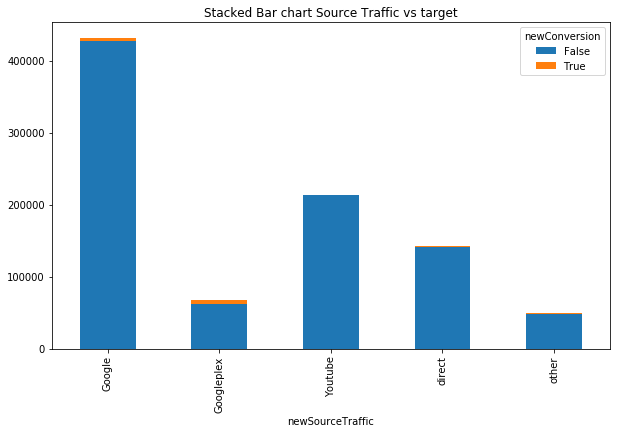

In [91]:
desc_cat_target(df, 'newSourceTraffic', 'newConversion', name='Source Traffic')


### Export the changes of the dataset

In [92]:
df.head()

,channelGrouping,date,fullVisitorId,visitNumber,visitStartTime,deviceBrowser,deviceCategory,deviceIsMobile,deviceOS,geoCity,geoContinent,geoCountry,geoMetro,geoDomain,geoRegion,geoSubContinent,totalsBounces,totalsNewVisits,totalsPageviews,trafficSourceAdContent,adwordsClickAdNetworkType,adwordsClickGclId,adwordsClickInfoPage,adwordsClickInfoSlot,trafficSourceCampaign,trafficSourceIsTrueDirect,trafficSourceKeyword,trafficSourceMedium,trafficSourceReferralPath,trafficSourceSource,totalsTransactionRevenue,newRevenueDoll,newConversion,newIsOrganic,newChannel,newBrowser,newOS,geoDomainTerm,newAdContent,newAdCampaign,newAdKeyword,newReferralPath,newSourceTraffic
0,Organic Search,2016-09-02,1131660440785968503,1,1472830385,Chrome,desktop,False,Windows,Izmir,Asia,Turkey,Unknown,ttnet.com.tr,Izmir,Western Asia,1.0,1.0,1.0,NoAd,NoAdWords,0,0.0,NoAdwords,NoCampaign,False,NoKeyword,organic,NoReferral,google,0.0,0.0,False,1,organic,chrome,Windows,tr,NoAd,NoCampaign,NoKeyword,NoReferral,Google
1,Organic Search,2016-09-02,377306020877927890,1,1472880147,Firefox,desktop,False,Macintosh,Unknown,Oceania,Australia,Unknown,dodo.net.au,Unknown,Australasia,1.0,1.0,1.0,NoAd,NoAdWords,0,0.0,NoAdwords,NoCampaign,False,NoKeyword,organic,NoReferral,google,0.0,0.0,False,1,organic,firefox,Macintosh,au,NoAd,NoCampaign,NoKeyword,NoReferral,Google
2,Organic Search,2016-09-02,3895546263509774583,1,1472865386,Chrome,desktop,False,Windows,Madrid,Europe,Spain,Unknown,Unknown,Community of Madrid,Southern Europe,1.0,1.0,1.0,NoAd,NoAdWords,0,0.0,NoAdwords,NoCampaign,False,NoKeyword,organic,NoReferral,google,0.0,0.0,False,1,organic,chrome,Windows,Unknown,NoAd,NoCampaign,NoKeyword,NoReferral,Google
3,Organic Search,2016-09-02,4763447161404445595,1,1472881213,UC Browser,desktop,False,Linux,Unknown,Asia,Indonesia,Unknown,Unknown,Unknown,Southeast Asia,1.0,1.0,1.0,NoAd,NoAdWords,0,0.0,NoAdwords,NoCampaign,False,google + online,organic,NoReferral,google,0.0,0.0,False,1,organic,other,other,Unknown,NoAd,NoCampaign,Google,NoReferral,Google
4,Organic Search,2016-09-02,27294437909732085,2,1472822600,Chrome,mobile,True,Android,Unknown,Europe,United Kingdom,Unknown,Unknown,Unknown,Northern Europe,1.0,0.0,1.0,NoAd,NoAdWords,0,0.0,NoAdwords,NoCampaign,True,NoKeyword,organic,NoReferral,google,0.0,0.0,False,1,organic,chrome,Android,Unknown,NoAd,NoCampaign,NoKeyword,NoReferral,Google


In [93]:
df.shape

(903455, 43)

In [94]:
df.to_csv("data/df4.csv", index=False)